In [3]:
import os
# Local Imports
from src.seg2map import map_interface
from src.seg2map import log_maker #must be the first module loaded to create logs folder

# External Imports
import ee
from google.auth import exceptions as google_auth_exceptions

# suppress tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Authenticate and Initialize with Google Earth Engine (GEE)

- Run this cell to initialize with GEE which will allow you to download remote sensing data from GEE.

### First Time Users

- In order to use Google Earth Engine (GEE) you will need to sign up to request access to use Google Earth Engine.https://signup.earthengine.google.com. You will only need to do this once and it takes only a day to get your account verified.

### How `ee.Authenticate()` works

- In order to initialize with GEE you will need an authorization token with is obtained by running `ee.Authenticate()`.This token lasts 7 days and during those 7 days you will not need to authenticate with google earth engine with an access code. Once the 7 days are up you will need to reauthenticate to use GEE again.


In [4]:
try:
    ee.Initialize()
except google_auth_exceptions.RefreshError as exception:
    print("Please authenticate with Google:\n")
    ee.Authenticate()
    ee.Initialize()

# How to Use The Map

---
1.  Click `Save Settings` Button
1. Use the rectangle tool to draw a bounding box along the coastline.
2. Click `Generate ROI` to create ROI rectangles along the coastline in the bounding box. This may take some time.
- You should see a coastline appear in yellow and some rectangles along it.
3. Load transects into your bounding box with the `Load Transects` button. If any exist for the bounding box you selected they should appear.
4. Click the ROIs you want to download.
5. Once you've selected all the ROIs you want to download click `Downlod Imagery`
 - If any of the ROIs succesfully download they will have their own folder with all their data in the `data` directory in the `CoastSeg` directory
6. To extract a timeseries of shorelines for the ROIs you downloaded click `Extract Shorelines`
7. If any shorelines were extracted you can compute the cross distances along the transects and shoreline by clicking `Compute Transects` and save the output to a json file in the roi directory
8. If any shorelines were extracted you can compute the cross distances along the transects and shoreline by clicking `Save Transects CSV`  and save the output to a csv in the roi directory

In [ ]:
# from coastseg.map_UI import UI
from src.seg2map.map_UI import UI
from src.seg2map.map_interface import CoastSeg_Map

coastsegmap=CoastSeg_Map()
coastseg_ui = UI(coastsegmap)
coastseg_ui.create_dashboard()

In [ ]:
coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="1"]["geometry"][0]

In [ ]:
df = coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="1"].bounds.drop(index=0)


In [ ]:
coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"].bounds

In [ ]:
coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"].boundary.plot()


In [5]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiPolygon, Polygon
from shapely.ops import split
def splitPolygon(polygon, nx, ny):
    minx, miny, maxx, maxy = polygon.bounds.iloc[0]
    dx = (maxx - minx) / nx  # width of a small part
    dy = (maxy - miny) / ny  # height of a small part
    horizontal_splitters = [LineString([(minx, miny + i*dy), (maxx, miny + i*dy)]) for i in range(ny)]
    vertical_splitters = [LineString([(minx + i*dx, miny), (minx + i*dx, maxy)]) for i in range(nx)]
    splitters = horizontal_splitters + vertical_splitters
    result = polygon["geometry"].iloc[0]
    for splitter in splitters:
        result = MultiPolygon(split(result, splitter))
    return result

# polygon = coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]["geometry"].iloc[0]
polygon = coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]
myPolygons = splitPolygon(polygon, 5, 5)
import geopandas as gpd
gdfR   = gpd.GeoDataFrame(columns=['geometry'], data=myPolygons.geoms)
f,ax=plt.subplots()
gdfR.boundary.plot(ax=ax, color='red')
polygon.boundary.plot(ax=ax)

NameError: name 'coastsegmap' is not defined

In [ ]:
polygon = coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]
minx, miny, maxx, maxy = polygon.bounds.iloc[0]
minx, miny, maxx, maxy

In [ ]:
polygon.bounds.iloc[0]

In [ ]:
polygon.bounds.iloc[0][0]

In [ ]:
d=coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"].bounds.to_dict()
d

In [ ]:
for k,v in d.items():
    # keyz=v.keys()
    print(list(v.values())[0])
    # print((list(keyz))[0])
    # print(v[(list(keyz))[0]])

In [ ]:
minx=list(d['minx'].values())[0]
miny=list(d['miny'].values())[0]
maxx=list(d['maxx'].values())[0]
maxy=list(d['maxy'].values())[0]
minx, miny, maxx, maxy

In [ ]:
from shapely.geometry import LineString, MultiPolygon, Polygon

dx = (maxx - minx) / num_splitters  # width of a small part
dy = (maxy - miny) / num_splitters  # height of a small part
horizontal_splitters = [
    LineString([(minx, miny + i * dy), (maxx, miny + i * dy)])
    for i in range(num_splitters)
]
vertical_splitters = [
    LineString([(minx + i * dx, miny), (minx + i * dx, maxy)])
    for i in range(num_splitters)
]

In [ ]:
horizontal_splitters

In [ ]:
vertical_splitters

In [ ]:
splitters = horizontal_splitters + vertical_splitters
splitters

In [ ]:
coastsegmap.rois.gdf.area

In [ ]:
area(json.loads(coastsegmap.rois.gdf.to_json())['features'][1]['geometry'])

In [ ]:
coastsegmap.rois.gdf.crs

In [ ]:
coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]["geometry"].iloc[0].area

In [ ]:
coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]["geometry"].iloc[0]

In [ ]:
polygon = coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]["geometry"].iloc[0]
polygon

In [ ]:
from shapely.ops import split
result = polygon
for splitter in splitters:
    result = MultiPolygon(split(result, splitter))
parts = [list(part.exterior.coords) for part in result.geoms]

print("Number of individual tiles: {}".format(len(parts)))

In [54]:
import geopandas as gpd
import json
from area import area
import math
import requests

In [33]:
def get_num_splitters(gdf:gpd.GeoDataFrame)->int:
    # convert to geojson dictionary
    roi_json = json.loads(gdf.to_json())
    # only one feature is present select 1st feature's geometry
    roi_geometry = roi_json['features'][0]['geometry']
    # get area of entire shape as squared kilometers 
    area_km2=area(roi_geometry)/ 1e6
    print(f"Area(km^2): {area_km2}")
    # get minimum number of horizontal and vertical splitters to split area equally
    num_splitters = math.ceil(math.sqrt(area_km2))
    return num_splitters

In [34]:
def splitPolygon(polygon:gpd.GeoDataFrame, num_splitters:int):
    minx, miny, maxx, maxy = polygon.bounds.iloc[0]
    dx = (maxx - minx) / num_splitters  # width of a small part
    dy = (maxy - miny) / num_splitters  # height of a small part
    horizontal_splitters = [LineString([(minx, miny + i*dy), (maxx, miny + i*dy)]) for i in range(num_splitters)]
    vertical_splitters = [LineString([(minx + i*dx, miny), (minx + i*dx, maxy)]) for i in range(num_splitters)]
    splitters = horizontal_splitters + vertical_splitters
    result = polygon["geometry"].iloc[0]
    for splitter in splitters:
        result = MultiPolygon(split(result, splitter))
    return result

In [46]:
filename=r'C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\src\seg2map\NAIP\hidden_beach.geojson'
with open(filename, "r") as f:
        gpd_data = gpd.read_file(f)
gpd_data  

,geometry
0,"POLYGON ((-121.94776 36.51249, -121.94776 36.4..."


Area(km^2): 2.03344809745957
2


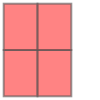

In [47]:
num_splitters = get_num_splitters(gpd_data)
print(num_splitters)
split_polygon = splitPolygon(gpd_data,num_splitters)
split_polygon

In [ ]:
print(split_polygon)

In [ ]:
# gpd.GeoDataFrame(geometry=split_polygon)
gpd.GeoSeries(split_polygon).to_json()

In [ ]:
# select an roi out of geodataframe 
roi_gdf=coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="2"]
#number of horizontal & vertical splitters needed to split ROI into equally sized tiles whose area <=10km^2
num_splitters = get_num_splitters(roi_gdf)
num_splitters

In [ ]:
split_polygon = splitPolygon(roi_gdf,num_splitters)
split_polygon

In [29]:
from typing import List
def create_time_series_dirs(sitename:str,years:List[int],num_features:int):
    for featurenumber in range(num_features):
        for year in years:
            dir_path = os.path.abspath(sitename + os.sep + "feature" + str(featurenumber))
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)
            sub_dir=os.path.join(dir_path,str(year))
            if not os.path.exists(sub_dir):
                os.makedirs(sub_dir)

In [43]:
sitename="doge_palace"
years = ["2006", "2009",]
num_features=1
create_time_series_dirs(sitename,years,num_features)
site_path=os.path.abspath(sitename + os.sep + "feature" + str(0)+ os.sep+years[0])
site_path

'C:\\1_USGS\\5_Doodleverse\\1_Seg2Map_fork\\seg2map\\doge_palace\\feature0\\2006'

In [24]:
from typing import List, Tuple
def download_tiles(tiles:MultiPolygon,site_path:str,gee_collection:str,dates:Tuple[str]):
    tile_coords= [list(part.exterior.coords) for part in tiles.geoms]
    print("Number of individual tiles: {}".format(len(tile_coords)))
    for counter,tile in enumerate(tile_coords):
        download_tile(tile,site_path,counter,gee_collection,dates)

In [25]:
import geemap

In [62]:
def download_tile(tile:List[Tuple],
                  site_path:str,
                  counter:int,
                  gee_collection:str,
                  dates:Tuple[str]):
    # full path where downloaded image will be saved
    OUT_RES_M = 0.5  # output raster spatial footprint in metres
    
    tile_path=os.path.join(site_path,"chunk"+ str(counter))
    if os.path.exists(tile_path):
        os.makedirs(tile_path)
        
    collection = ee.ImageCollection(gee_collection)
    # print(f"Collection : {collection}")
    polys = ee.Geometry.Polygon(tile)
    # get center of polygon as longitude and latitude
    centroid = polys.centroid()
    lng, lat = centroid.getInfo()["coordinates"]
    # get portion of collection within tile
    collection = collection.filterBounds(polys)
    # only get images within the start and end date range
    collection = collection.filterDate(dates[0], dates[1]).sort(
                "system:time_start", True
            )
    count = collection.size().getInfo()
    print(f"Collection Size: {count}")
    if count == 0:
        return
    img_lst = collection.toList(1000)
    img_names = []
    for i in range(0, count):
        image = ee.Image(img_lst.get(i))
        name = image.get("system:index").getInfo()
        img_names.append(name)
    
    print(f"img_names: {img_names}")
    # download each of the images from the collection    
    for name in img_names:
        image = ee.Image(gee_collection+"/" + name)
        # full path where tif file will be saved
        tile_path=os.path.join(site_path,"chunk"+ str(counter))
        if not os.path.exists(tile_path):
            os.makedirs(tile_path)
        tif_path = os.path.join(tile_path,"chunk"+ str(counter)+ "_"+ name+ ".tif")
        multiband_path= os.path.join(tile_path,"chunk"+ str(counter)+ "_"+ name+ "_multiband.tif")
        print(f"tile_path: {tile_path}")
        print(f"tif_path: {tif_path}")
        print(f"multiband_path: {multiband_path}")
        # Export each band as one image
        ee_export_image(
            image,
            tif_path,
            scale=OUT_RES_M,
            region=polys,
            file_per_band=True,
            crs="EPSG:4326",)
        # export single image with all bands
        ee_export_image(
            image,
            multiband_path,
            scale=OUT_RES_M,
            region=polys,
            file_per_band=False,
            crs="EPSG:4326",
        )

In [63]:
def ee_export_image(
    ee_object,
    filename,
    scale=None,
    crs=None,
    crs_transform=None,
    region=None,
    dimensions=None,
    file_per_band=False,
    format="ZIPPED_GEO_TIFF",
    unmask_value=None,
    timeout=300,
    proxies=None,
):
    """Exports an ee.Image as a GeoTIFF.
    Args:
        ee_object (object): The ee.Image to download.
        filename (str): Output filename for the exported image.
        scale (float, optional): A default scale to use for any bands that do not specify one; ignored if crs and crs_transform is specified. Defaults to None.
        crs (str, optional): A default CRS string to use for any bands that do not explicitly specify one. Defaults to None.
        crs_transform (list, optional): a default affine transform to use for any bands that do not specify one, of the same format as the crs_transform of bands. Defaults to None.
        region (object, optional): A polygon specifying a region to download; ignored if crs and crs_transform is specified. Defaults to None.
        dimensions (list, optional): An optional array of two integers defining the width and height to which the band is cropped. Defaults to None.
        file_per_band (bool, optional): Whether to produce a different GeoTIFF per band. Defaults to False.
        format (str, optional):  One of: "ZIPPED_GEO_TIFF" (GeoTIFF file(s) wrapped in a zip file, default), "GEO_TIFF" (GeoTIFF file), "NPY" (NumPy binary format). If "GEO_TIFF" or "NPY",
            filePerBand and all band-level transformations will be ignored. Loading a NumPy output results in a structured array.
        unmask_value (float, optional): The value to use for pixels that are masked in the input image.
            If the exported image contains zero values, you should set the unmask value to a  non-zero value so that the zero values are not treated as missing data. Defaults to None.
        timeout (int, optional): The timeout in seconds for the request. Defaults to 300.
        proxies (dict, optional): A dictionary of proxy servers to use. Defaults to None.
    """

    if not isinstance(ee_object, ee.Image):
        print("The ee_object must be an ee.Image.")
        return

    if unmask_value is not None:
        ee_object = ee_object.selfMask().unmask(unmask_value)
        if isinstance(region, ee.Geometry):
            ee_object = ee_object.clip(region)
        elif isinstance(region, ee.FeatureCollection):
            ee_object = ee_object.clipToCollection(region)

    filename = os.path.abspath(filename)
    basename = os.path.basename(filename)
    name = os.path.splitext(basename)[0]
    filetype = os.path.splitext(basename)[1][1:].lower()
    filename_zip = filename.replace(".tif", ".zip")

    if filetype != "tif":
        print("The filename must end with .tif")
        return

    try:
        print("Generating URL ...")
        params = {"name": name, "filePerBand": file_per_band}

        params["scale"] = scale
        if region is None:
            region = ee_object.geometry()
        if dimensions is not None:
            params["dimensions"] = dimensions
        if region is not None:
            params["region"] = region
        if crs is not None:
            params["crs"] = crs
        if crs_transform is not None:
            params["crs_transform"] = crs_transform
        params["format"] = format

        try:
            url = ee_object.getDownloadURL(params)
        except Exception as e:
            print("An error occurred while downloading.")
            print(e)
            return
        print(f"Downloading data from {url}\nPlease wait ...")
        r = requests.get(url, stream=True, timeout=timeout, proxies=proxies)

        if r.status_code != 200:
            print("An error occurred while downloading.")
            return

        with open(filename_zip, "wb") as fd:
            for chunk in r.iter_content(chunk_size=1024):
                fd.write(chunk)

    except Exception as e:
        print(e)
        print("An error occurred while downloading.")
        print(r.json()["error"]["message"])
        return

    try:
        with zipfile.ZipFile(filename_zip) as z:
            z.extractall(os.path.dirname(filename))
        os.remove(filename_zip)

        if file_per_band:
            print(f"Data downloaded to {os.path.dirname(filename)}")
        else:
            print(f"Data downloaded to {filename}")
    except Exception as e:
        print(e)

In [60]:
url=r'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/5e076fc4649f0b802aa30a3d5d65e1e8-1b2b9fa9c5d8e91da880f0809490c0e7:getPixels'
r = requests.get(url, stream=True)
r

<Response [200]>

In [61]:
filename_zip=r'C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0\chunk0_m_3612125_se_10_1_20090622.zip'
os.mkdir()
if not os.path.exists(filename_zip):
    
with open(filename_zip, "wb") as fd:
    for chunk in r.iter_content(chunk_size=1024):
        fd.write(chunk)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\1_USGS\\5_Doodleverse\\1_Seg2Map_fork\\seg2map\\doge_palace\\feature0\\2006\\chunk0\\chunk0_m_3612125_se_10_1_20090622.zip'

In [59]:
import zipfile

with open("filename_zip.zip", "wb") as fd:
    zip_file = zipfile.ZipFile(fd, "w")
    zip_file.writestr("string_file.txt", "UBG")
    zip_file.close()


In [58]:
with open("filename_zip.zip", "wb") as fd:
        fd.write("UBG")

TypeError: a bytes-like object is required, not 'str'

In [64]:
year=years[1]
start_date = year + "-01-01"
end_date = year + "-12-31"
dates=(start_date,end_date)
gee_collection = "USDA/NAIP/DOQQ"
download_tiles(split_polygon,site_path,gee_collection,dates)

Number of individual tiles: 4
Collection Size: 4
img_names: ['m_3612125_se_10_1_20090622', 'm_3612125_sw_10_1_20090622', 'm_3612133_ne_10_1_20090622', 'm_3612133_nw_10_1_20090622']
tile_path: C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0
tif_path: C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0\chunk0_m_3612125_se_10_1_20090622.tif
multiband_path: C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0\chunk0_m_3612125_se_10_1_20090622_multiband.tif
Generating URL ...
Please wait ...
Data downloaded to C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0
Generating URL ...
Please wait ...
Data downloaded to C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0\chunk0_m_3612125_se_10_1_20090622_multiband.tif
tile_path: C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\seg2map\doge_palace\feature0\2006\chunk0
tif_path: C:\1_USGS\5_Doodleverse\1_Seg2Map_fork\

In [ ]:
coordinates=list(coastsegmap.rois.gdf[coastsegmap.rois.gdf["id"]=="1"]["geometry"][0].exterior.coords)
coordinates

In [ ]:
coordinates=[list(x)for x in coordinates]

In [ ]:
coordinates

In [ ]:
from area import area
area_km2=area(rect['features'][0]['geometry'])/ 1e6
area_km2
# 0.00887890515200013

In [ ]:
import math
# get minimum number of horizontal and vertical splitters
num_splitters = math.ceil(math.sqrt(area_km2/10))
num_splitters

In [ ]:

minx, miny, maxx, maxy = polygon.bounds
minx, miny, maxx, maxy

In [ ]:
y=[1,2,3,4]
y

In [ ]:
y.remove(2)

In [ ]:
y

In [ ]:
x=set([1,2,3,4])
x

In [ ]:
len(x)

In [ ]:
x.remove(3)

In [ ]:
x

In [ ]:
print(coastsegmap.map.find_layer('ROI'))

In [ ]:
def get_callback(marker, html):
    def callback(*args, **kwargs):
        html.value = '''
            <b>Glider Mission:</b><br>
            {}
        '''.format(marker.name)

    return callback

marker.on_mouseover(get_callback(marker, html))

In [ ]:
def delete_callback(layer,coastseg_map):
    def callback(*args, **kwargs):
        print("yesss")
        coastseg_map.accordion.children[0].value=""" 
        <p>Layer: {}</p>
        """.format(
            layer
        )
        layer.style=delete_style

    return callback

 # 'on_mouseout',
 # 'on_mouseover',
# marker.on_mouseover(get_callback(layer))

In [ ]:
def normal_callback(layer,coastseg_map):
    def callback(*args, **kwargs):
        print("yesss")
        coastseg_map.accordion.children[0].value=""" 
        <p>Layer: {}</p>
        """.format(
            layer
        )
        layer.style=normal_style

    return callback

In [ ]:
# dir(coastsegmap.map.find_layer('ROI'))

In [ ]:
layer = coastsegmap.map.find_layer('ROI')
# layer.on_hover(delete_callback(layer,coastsegmap))
layer.on_mouseover(delete_callback(layer,coastsegmap))
# layer.on_mouseout(normal_callback(layer,coastsegmap))
existing_layer = coastsegmap.map.find_layer('ROI')
if existing_layer is not None:
    coastsegmap.map.remove_layer(existing_layer)
coastsegmap.map.add_layer(layer)

In [ ]:
existing_layer = coastsegmap.map.find_layer('ROI')
if existing_layer is not None:
    coastsegmap.map.remove_layer(existing_layer)

In [ ]:
coastsegmap.map

In [ ]:
layer.on_hover

In [ ]:
delete_style = {'color': '#f73c02', 'fill_color': '#f73c02', 'fillOpacity': 0.1, 'weight': 1}
unselect_style = {'color': '#555555', 'fill_color': '#555555', 'fillOpacity': 0.1, 'weight': 1}
selected_style = {'color': '#ed2805', 'fill_color': '#ed2805', 'fillOpacity': 0.1, 'weight': 1}

In [ ]:
coastsegmap.map.find_layer('ROI').style=unselect_style

In [ ]:
# change layer to selected for deletion
layer = coastsegmap.map.find_layer('ROI')
layer.style=style={'color': '#ed2805', 'fill_color': '#ed2805', 'fillOpacity': 0.1, 'weight': 1}
coastsegmap.map.add_layer(layer)

In [ ]:
# deselect layer for deletion
layer = coastsegmap.map.find_layer('ROI')
layer.style=style={'color': '#555555', 'fill_color': '#555555', 'fillOpacity': 0.1, 'weight': 1}
coastsegmap.map.add_layer(layer)

In [ ]:
print(coastsegmap.rois)
print(coastsegmap.ids)

In [ ]:
new_id = "1" if coastsegmap.ids == [] else  str(int(max(coastsegmap.ids))+1)
new_id

In [ ]:
print(coastsegmap.rois.gdf)

In [ ]:
import geopandas as gpd

In [ ]:
filename = r"C:\1_USGS\CoastSeg\repos\2_CoastSeg\CoastSeg_fork\Seg2Map\rois.geojson"
with open(filename, "r") as f:
    gpd_data = gpd.read_file(f)

In [ ]:
gpd_data

In [ ]:
main = gpd_data[gpd_data["id"]!=id]
main

In [ ]:
id="13"
new_gdf = gpd_data[gpd_data["id"]==id]
new_gdf

In [ ]:
import pandas as pd
new_gdf = gpd.GeoDataFrame(
        pd.concat([main, new_gdf], ignore_index=True)
    )


In [ ]:
new_gdf

In [ ]:
class Feature:
    def __init__(self):
        self.gdf=""

In [ ]:
feature =  Feature()

In [ ]:
hasattr(feature,"gdf")

In [ ]:
type(gpd_data) == gpd.GeoDataFrame